In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Set path
path = 'drive/MyDrive/SB_practical_notebooks/data/'

In [ ]:
!pip install scipy
!pip install matplotlib
!pip install biopython

     |████████████████████████████████| 2.3 MB 11.6 MB/s 


In [ ]:
import copy
from Bio.PDB import PDBList, NeighborSearch
from Bio.PDB.PDBParser import PDBParser
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import scipy.signal

In [ ]:
def get_distance_matrix(residues, seq_sep=6):

    # Calculate the distance matrix
    distances = []
    for residue1 in residues:
        if residue1.id[0] == " ":  # Exclude hetero/water residues
            row = []
            for residue2 in residues:
                if residue2.id[0] == " ":  # Exclude hetero/water residues
                    if abs(residue1.id[1] - residue2.id[1]) >= seq_sep:
                        row.append(residue1["CA"] - residue2["CA"])
                    else:
                        row.append(None) # For residues not respecting sequence separation
            distances.append(row)

    return np.array(distances, dtype=float)


#########################################

In [ ]:
# Fetch a PDB file to the current dir
pdbl = PDBList()

# Input
pdb_id = '1ucd'

pdbl.retrieve_pdb_file(pdb_id, pdir=path, file_format='pdb')  # Will save to pdbXXXX.ent
structure = PDBParser(QUIET=True).get_structure(pdb_id, path + "pdb{}.ent".format(pdb_id))
selected_residues = structure[0]['A']  # select chain A of first model (0)

# Calculate the contact map using the NeighborSearch module (fast)
# https://biopython.org/docs/1.75/api/Bio.PDB.NeighborSearch.html
# ns = NeighborSearch([atom for residue in selected_residues for atom in residue.get_atoms()])
# for residue1, residue2 in ns.search_all(3.5, level="R"):  # level="R" returns pairs of residues in contact considering all atoms
#    if residue1.id[0] == " " and residue2.id[0] == " ":  # Exclude hetero/water residues
#         if abs(residue1.id[1] - residue2.id[1]) > 6:  # Sequence separation > 6
#            print(residue1.id, residue2.id)


# Usually sequence separation thresholds are: 6 (short range), 12, 24 (long range)
sequence_separation = 6

dist_matrix = get_distance_matrix(selected_residues, sequence_separation)

#########################################

Structure exists: 'drive/MyDrive/SB_practical_notebooks/data/pdb1ucd.ent' 


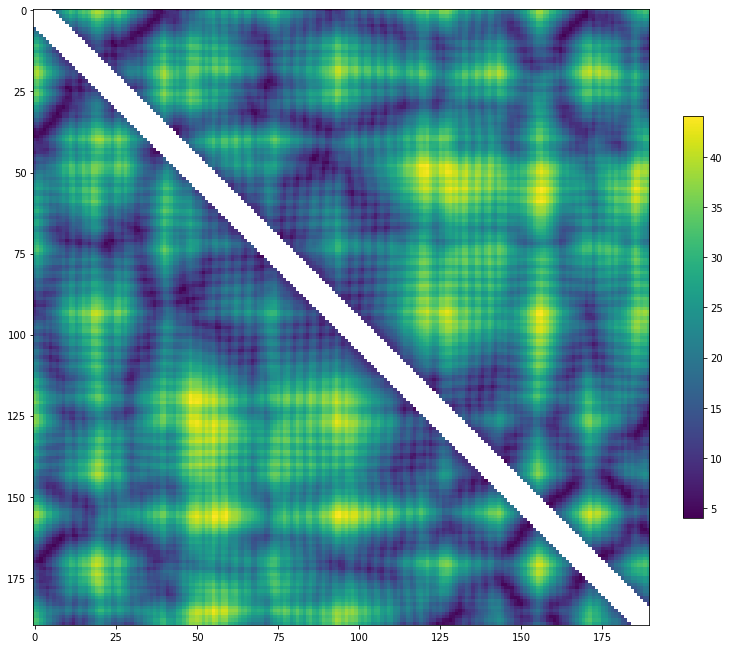

In [ ]:
# Plot distance matrix

# Alter the color map to highlight nan values (the diagonal)
current_cmap = copy.copy(matplotlib.cm.get_cmap())
current_cmap.set_bad(color='white')

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(dist_matrix) #Useful to plot color maps
fig.colorbar(im, fraction=0.03, pad=0.05)
plt.savefig(path + 'ca_distances_{}.png'.format(pdb_id), bbox_inches='tight')

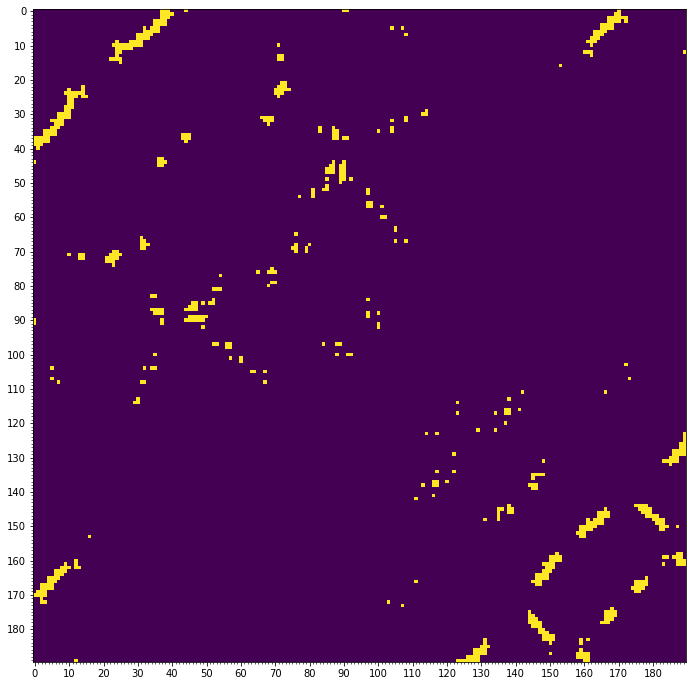

In [ ]:
# Plot contact map
contact_map = (dist_matrix[:] < 8).astype(float)  
# Calculate the contact map based on a distace threshold 8 Angstrom
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(contact_map)

# Set ticks
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

plt.savefig(path + 'ca_contacts_{}.png'.format(pdb_id), bbox_inches='tight')

Structure exists: 'drive/MyDrive/SB_practical_notebooks/data/pdb1ioo.ent' 


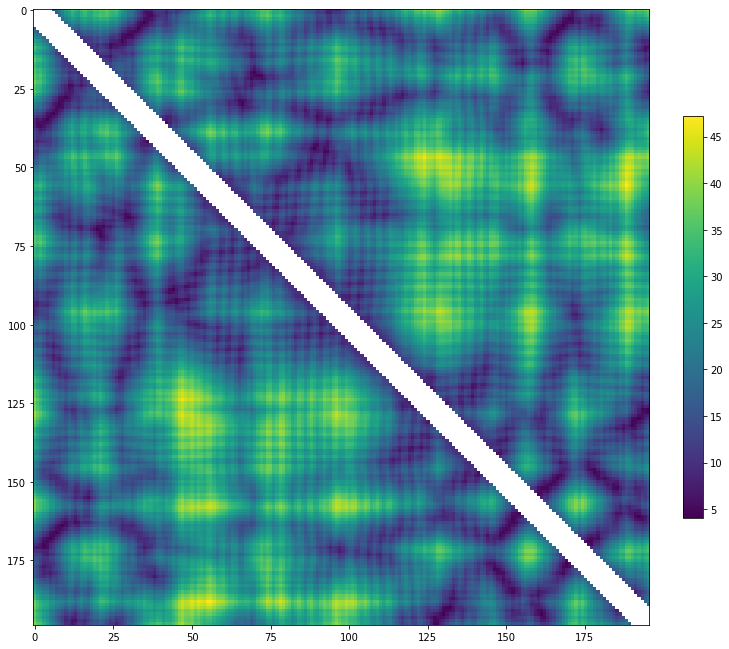

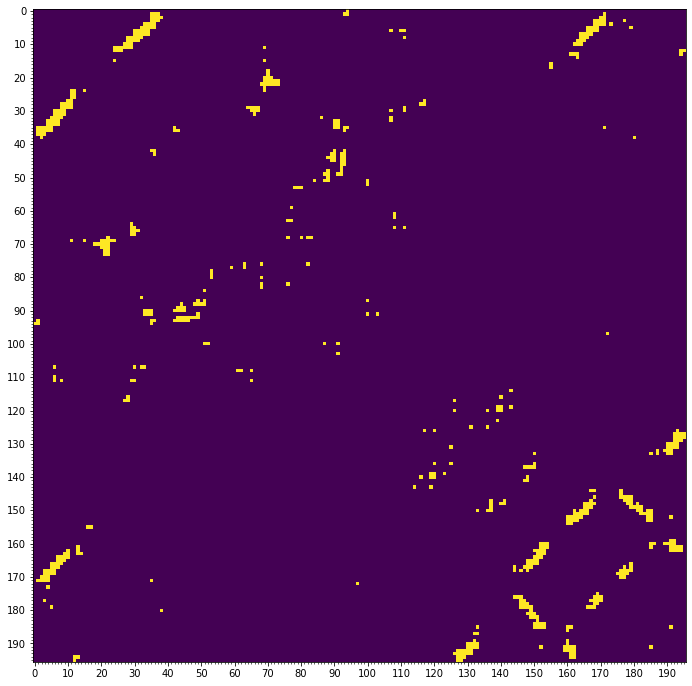

In [ ]:
# Calculate distance matrix of another PDB
# Input
pdb_id = '1ioo'
pdbl.retrieve_pdb_file(pdb_id, pdir=path, file_format='pdb')  # Will save to pdbXXXX.ent
structure = PDBParser(QUIET=True).get_structure(pdb_id, path +"pdb{}.ent".format(pdb_id))
selected_residues = structure[0]['A']  # select chain A of first model (0)
dist_matrix2 = get_distance_matrix(selected_residues, sequence_separation)

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(dist_matrix2)
fig.colorbar(im, fraction=0.03, pad=0.05)
plt.savefig(path + 'ca_distances_{}.png'.format(pdb_id), bbox_inches='tight')

# Plot contact map
contact_map_2 = (dist_matrix2[:] < 8).astype(float)  # Calculate the contact map based on a distace threshold 8 Angstrom
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(contact_map_2)

# Set ticks
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

plt.savefig(path + 'ca_contacts_{}.png'.format(pdb_id), bbox_inches='tight')

# Set ticks
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
2288.0
95 95


<Figure size 432x288 with 0 Axes>

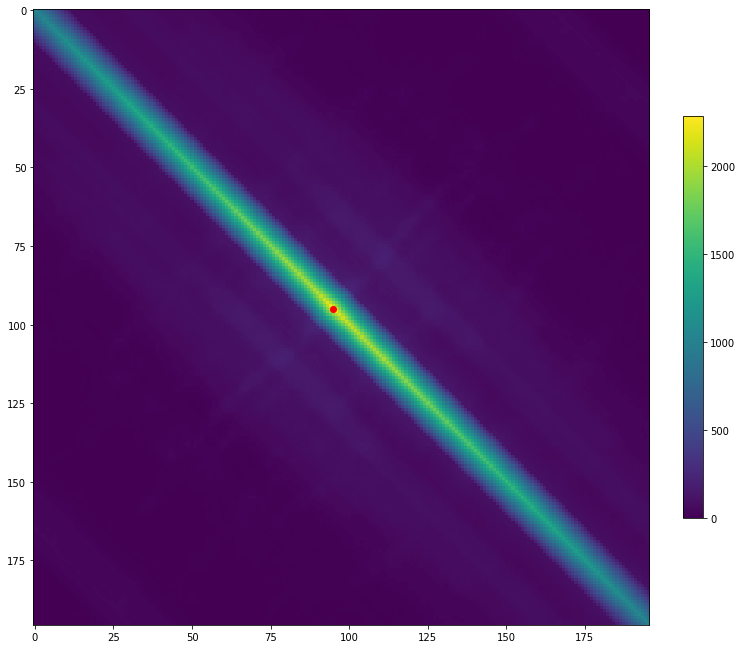

In [ ]:
# Align contact maps / distance matrices (cross-correlation)
# https://stackoverflow.com/questions/59651335/aligning-two-binary-matrices-for-maximum-overlap


# Full distance matrix
# Replace NaN in place (not necessary if sequence separation threshold is set to 0)
np.nan_to_num(dist_matrix, copy=False, nan=0.0)
np.nan_to_num(dist_matrix2, copy=False, nan=0.0)
#contact_matrix = dist_matrix
#contact_matrix2 = dist_matrix2


# Contact maps
contact_matrix = (dist_matrix[:] < 8).astype(float)  # check distance matrix has diagonals, otherwise cross correlation fail
contact_matrix2 = (dist_matrix2[:] < 8).astype(float)
print(contact_matrix)

plt.savefig(path + 'ca_contacts_{}.png'.format(pdb_id), bbox_inches='tight')


corr = scipy.signal.correlate2d(contact_matrix2, contact_matrix, mode="same")  # cross correlation
# corr = scipy.signal.convolve2d(contact_matrix2, contact_matrix)  # convolution
# print(corr)

y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find which is the maximum correlation and which is the point where the two matrices reach this value
print(corr.max())
print(x, y)

# Plot cross-correlation
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(corr)
ax.scatter([x], [y], color='red')
fig.colorbar(im, fraction=0.03, pad=0.05)
plt.savefig(path + 'ca_distances_correlation.png'.format(pdb_id), bbox_inches='tight')


233.0
87 93


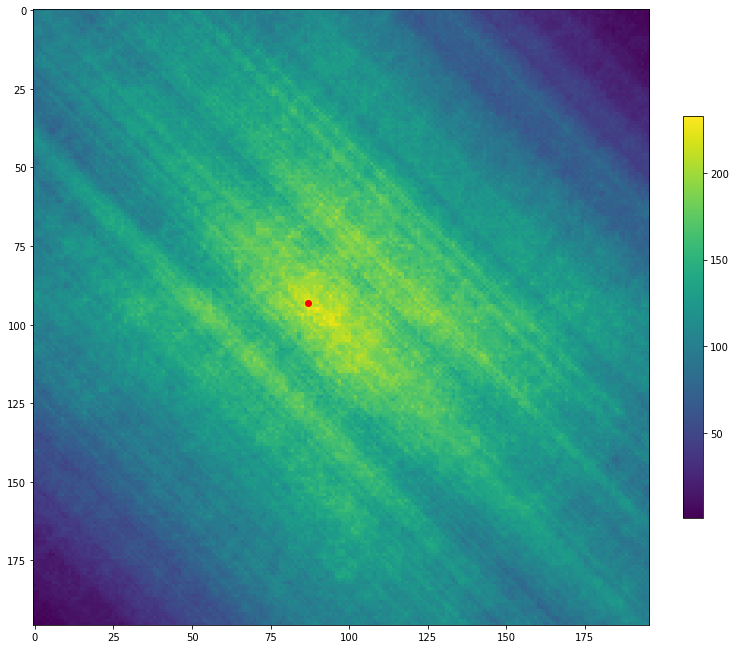

In [ ]:
#########################################
# Plot cross-correlation with one random matrix

# Randomize the first matrix
random_matrix = np.copy(contact_matrix) #first copy the contact map in a new variable
np.random.shuffle([np.random.shuffle(c) for c in random_matrix]) #shuffle the matrix

corr_random = scipy.signal.correlate2d(contact_matrix2, random_matrix, mode="same")  # cross correlation random
y, x = np.unravel_index(np.argmax(corr_random), corr_random.shape)  # find the match
print(corr_random.max())
print(x, y)

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(corr_random)
ax.scatter([x], [y], color='red')
fig.colorbar(im, fraction=0.03, pad=0.05)
plt.savefig(path + 'ca_distances_correlation_random.png'.format(pdb_id), bbox_inches='tight')